<a href="https://colab.research.google.com/github/asheta66/Data-Science/blob/main/Practice_LR_Diabeties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a name="p2"></a>

---
## **Example 2: Diabetes Dataset**
---
#### **About the Dataset**
Diabetes is the 8th leading cause of death in the United States. More than 37 milion people in the U.S. have diabetes, and one in 5 of these individuals do not know it. This dataset contains data from diabetic patients with features such as their BMI, age, blood pressure, and glucose levels, which are useful in predicting the diabetes disease progression in patients. We will be looking at these variables to help predict disease progression in diabetic patients.

The features are as follows:
* `AGE`: age (in years)
* `SEX`
* `BMI`: body mass index
* `BP`: average blood pressure
* `S1`: tc, total serum cholesterol
* `S2`: ldl, low-density lipoproteins
* `S3`: hdl, high-density lipoproteins
* `S4`: tch, total cholesterol / HDL
* `S5`: ltg, possibly log of serum triglycerides level
* `S6`: glu, blood sugar level
* `Y`: quantitative measure of disease progression one year after baseline

**Note:** Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of the number of samples (i.e. the sum of squares of each column totals 1).

#### **Your Task**
Using the Diabetes dataset, you will do the following:
* Build a model that will predict disease progression in diabetic patients;
* Predict the disease progression of a patient with various ages, BMIs, and blood pressures.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

### **Step #1: Load the data**

In [18]:
file = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
df = pd.read_table(file, header=0, delim_whitespace=True)
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


### **Step #2: Decide independent and dependent variables**

Here we would like to use the `AGE` `BMI` and `BP` columns as our independent variables and `Y` as our dependent variable.

We are building a predictor of disease progression.


In [19]:
features =df[['AGE', 'BMI','BP']]
target =df['Y']

In [20]:
features.head()

,AGE,BMI,BP
0,59,32.1,101.0
1,48,21.6,87.0
2,72,30.5,93.0
3,24,25.3,84.0
4,50,23.0,101.0


### **Step #3: Split data into training and testing data**

Use `AGE`, `BMI`, and `BP` for our independent variables.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### **Step #4: Import your model**

In [22]:
from sklearn.linear_model import LinearRegression
# Create a linear regression model and fit it on the training data
model = LinearRegression()

### **Step #5: Initialize your model and set hyperparameters**


Linear regression takes no hyperparameters, so just initialize the model.

In [23]:
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Get the intercept and coefficients
intercept_formatted = f"{intercept:.3f}"
coefficients_formatted = [f"{coef:.3f}" for coef in coefficients]

print("Intercept:", intercept_formatted)
print("Coefficients:", coefficients_formatted)

Intercept: -218.347
Coefficients: ['0.176', '9.012', '1.309']


### **Step #6: Fit your model, test on the testing data, and create a visualization if applicable**

In [25]:
y_pred = model.predict(X_test)

#### **Create a visualization**

Use `y_test` and your `prediction` from the model to create a scatter plot. Then use the following line to visualize where a correct prediction would be. The code has already been given to you.
```
plt.plot([0, 300], [0, 300], '--k', label="Correct prediction")
```

<Figure size 500x500 with 0 Axes>

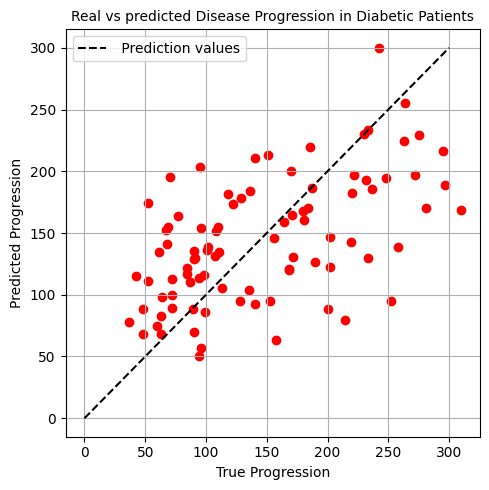

In [32]:
plt.figure(figsize=(5, 5))

plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, color = 'red')
plt.plot([0, 300], [0, 300], '--k', label=" Prediction values")
plt.axis('tight')
plt.xlabel('True Progression')
plt.ylabel('Predicted Progression')
plt.title("Real vs predicted Disease Progression in Diabetic Patients", fontsize=10)
plt.legend()
plt.grid(True)
plt.tight_layout()

### **Step #7: Evaluate your model**

Use mean squared error and the R2 score as the evaluation metrics.


In [35]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print('Mean Square Error :', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ', mae)

r2 = r2_score(y_test, y_pred)
print('R2                            :', r2)

Mean Square Error : 3756.8366496443828
Mean Absolute Error:  50.018817544725025
R2                            : 0.2909156196410876


### **Step #8: Use the model**

Using the model we created, predict the disease progression of two new patients:

* Patient 1:  age 45, bmi of 26.3, and average blood pressure of 98

* Patient 2:  age 39, bmi of 22.7, and average blood pressure of 114

**Note:** you must create a dataframe containing with the information of the new patients:

```python
new_patient_data = pd.DataFrame(new_patient_data_here, columns =["AGE", "BMI", "BP"])
```

In [37]:
new_data = pd.DataFrame({
    'AGE': [45, 39],
    'BMI': [26.3, 22.7],
    'BP': [98, 114],
})

new_data_df = pd.DataFrame(new_data)
new_data_df

,AGE,BMI,BP
0,45,26.3,98
1,39,22.7,114


In [42]:
# Predict using the model
predicted_diabeties = model.predict(new_data_df)

# Add the predicted prices to the DataFrame
new_data_df['Predicted_Diabeties'] = predicted_diabeties

# Display the DataFrame with predicted diabeties
new_data_df

,AGE,BMI,BP,Predicted_Diabeties
0,45,26.3,98,154.854686
1,39,22.7,114,142.301619


### **Reflection questions**
Answer the following questions based on the scatter plot:

1. Does your model tend to overpredict or underpredict for a true progression value less than 150?
2. Does your model tend to overpredict or underpredict for a true progression value above 150?

---
#End of Notebook

© 2023 The Coding School, All rights reserved